# Complex Systems

Week 6-7, Semester 2, 2019
Students: Angela, Farid, Cassidy, Tracey, Alex

### Bak-Tang-Wiesenfeld Model (Mathematical sandpile)
A cellular automaton where grains of sand are randomly placed in discrete cells until a threshold value is reached. When this happens, an avalanche follows. 

To create this model, first begin with an N by N grid. At each site, assign $z(i, j, t)$ as the number of grains present. Define $\delta (i, j)$ as the random site, giving the final state of the system as $Z(\tau) = \sum_{t=0}^{\tau} \sum_{(i, j)} z(i, j, 0) + \delta_{t}(i, j)$. 

1. Setting each cell to have 0 sand.
2. Randomly (pick a distribution?) add 1 sand to each cell.
3. When a thereshold sand value of 4 is reached, begin avalanche. 
4. At the edges, delete the sand. 
5. Repeat 1-3 until the system is statistically stationary.

### Toppling
During an avalanche, toppling events occur until the system stabilises. In a toppling event, add 1 sand to each adjacent i and j cells, such that an avalanche beginning at $z(i, j, t)$ describes: 

$
\begin{align*}
z(i ,j, t) &= z(i ,j, t) - 4 \\
z(i +- 1, j ,t) &= z(i +- 1, j, t) + 1 \\
z(i, j+- 1, t) &= z(i, j+- 1, t) + 1 \\
\end{align*}$

The avalanche is characterised by
- S: Number of grains of sand displaced (number of avalanches * threshold).
- T: the number of timesteps it takes for an avalanche to relax the system to a critical state.
- A: Number of unique sites that topple.
- R: The maximum distance from the original toppling site 

#### Q1 
We're insisting on finite boundaries because if the probability distribution used to get step 2 is normalised over the whole space, the value of pdf approaches zero. In a non-random way, it is not important for the system to have finite boundaries because this allows us to see how the system behaves at large $t$, and the system will approach equilibrium when the dropping stops.

#### Toppling Matrix
The toppling matrix $\delta_{x,y}^V$ is the amount of sand the site $x$ distributes to $y$, an adjacent cell. The toppling matrix has the following properties.

$\forall x,y \in V, x!=y, \delta_{x,y}^V = \delta_{y,x}^V \leq 0$ Points at opposite ends of the table can only gain sand or stay stable but not lose them.

$\forall x \in V, \delta_{x,x}^V \geq 1$ The amount of sand each cell can lose is at least 1.

$\forall x \in V, \sum_{y \in V}\delta_{x,y}^V \geq 0$ cannot gain more sand from a toppling.

$\sum_{x \in V}\sum_{y \in V}\delta_{x,y}^V > 0$ Eventually will lose sand over the table.

#### Abelian property
The Abelian property states that in the event that there's more than one cells reaching the threshold at a given time, the order in which which cell should undergo the topple first does not matter. 

### Stastical stationary

#### Q2

A system that is statistically stationary when the probability distribution of the contents of each cell does not change but there may be avalanches and random additions of sand still happening, i.e. $Z(t) -> constant$ (or when the rate of sand dropping is equal to the rate of sand deletion $s(i, j)$, i.e. $\delta (i, j) = s(i, j)$). A system is in equilibrium when its state of motion or internal energy does not change in time. Our sandpile will likely be statitically stationary after some time $t_s$ but it will not be in equilibrium unless $\delta (i, j) = s(i, j) = 0$ and $Z(t) -> constant$ (there are no more addition or deletion of sand and the states of each cell are constant.

#### Q3

There is no difference between sampling a system over time and sampling an ensemble of systems over long periods of time according to the ergodic hypothesis.

In [2]:
import pathlib
import time

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

grid now:
[[0 0 0 0 1]
 [0 0 0 0 0]
 [0 1 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 0 1]
 [0 0 2 0 0]
 [0 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 0 1]
 [0 0 3 0 0]
 [0 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 1 1]
 [0 0 3 0 0]
 [0 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 1 1]
 [0 0 3 0 1]
 [0 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 1 1]
 [0 1 3 0 1]
 [0 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 1 1]
 [0 1 3 0 1]
 [1 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 1 1]
 [1 1 3 0 1]
 [1 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 0 1 1]
 [1 1 3 1 1]
 [1 1 0 0 0]]
grid now:
[[0 0 0 1 1]
 [0 2 1 0 0]
 [0 1 1 1 1]
 [1 1 3 1 1]
 [1 1 0 0 0]]
grid now:
[[0 1 0 1 1]
 [0 2 1 0 0]
 [0 1 1 1 1]
 [1 1 3 1 1]
 [1 1 0 0 0]]
grid now:
[[0 1 0 1 2]
 [0 2 1 0 0]
 [0 1 1 1 1]
 [1 1 3 1 1]
 [1 1 0 0 0]]
grid now:
[[1 1 0 1 2]
 [0 2 1 0 0]
 [0 1 1 1 1]
 [1 1 3 1 1]
 [1 1 0 0 0]]
grid now:
[[

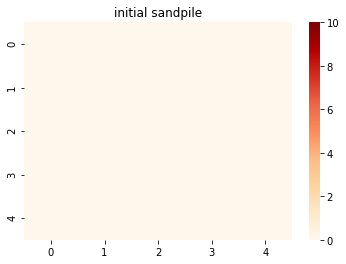

In [132]:
%run sandpile.py # import sandpile.py, letting us use all functions as it is.
# Initialise a sandpile on a table
size = 5
sand = SandPile(size,size)
max_sand = 10

# Plot initial

ax = sns.heatmap(sand.grid, cmap = "OrRd", vmax=max_sand)
ax.set_title("initial sandpile")
fig = ax.get_figure()
fig.savefig(f"initial_{str(size)}.png")

sand.avalanche(5)
print(f"\ngrid final")
print(f"{sand.grid}")

sand.area = np.array(sand.area)
initial = np.array(sand.area[0])

sand.length = np.sqrt((sand.area[:,0] - initial[0])**2 + (sand.area[:,1] - initial[1])**2)
#print(sand.length)


print(f"\nthere are {sand.topples} toppling events")
print(f"from which we lost {sand.loss} grains of sand")
print(f"from {sand.area}, so {len(sand.area)} unique sites were toppled")
print(f"the furthest topple happened {max(sand.length)} units away")

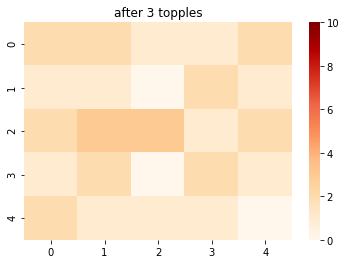

In [133]:
# Plotting

ax = sns.heatmap(sand.grid, cmap = "OrRd", vmax=max_sand)
ax.set_title(f"after {sand.topples} topples")
fig = ax.get_figure()
fig.savefig(f"after_{size}_{sand.topples}.png")
